In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This is the first dataset related TelcomCustomer-Churn_1.csv'
df=pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
#This is 2 Dataframe related to Telecom-churn
df1=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
df1.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Lets merge the 2 dataframes of telecom so that we can do in detail analysis of it
df_final=pd.merge(df,df1,how='left',on='customerID')

In [7]:
#df_final is our main data frame which we would perform our Analysis
df_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#To Validate if all columns are present after join. As per below all relevant columns exist after merge.
if list(df_final.columns) == list(df.columns)+list(df1.drop('customerID',axis=1).columns):
    print('All columns are present')

All columns are present


In [9]:
#2A mpute missing/unexpected values in the DataFrame.
df_final.isnull().sum(axis=0)
#As we can see the df has no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df_final.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
#2B ake sure all the variables with continuous values are of ‘Float’ type.
df_final.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As per above we can see that SeniorCitizen is mistakenly taken as continous. Hence we will convert it into categorical

In [12]:
df_final['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
#We have converted SeniorCitizen to category
df_final['SeniorCitizen']=df_final['SeniorCitizen'].astype(dtype='category')

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [16]:
# We can see data type mismatch for TotalCharges. Lets investigate it
list(df_final['TotalCharges'].unique())

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [17]:
#As per above list there is a blank value in total charges hence it was selected as object dtype. 
df_final[df_final['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
#We can see that 11 records are having blank TotalChrges
len(df_final[df_final['TotalCharges']==' '])/df_final.shape[0]

0.001561834445548772

In [19]:
#Above is a very small percentage hence those records can be dropped and we can convert TotalCharges to float 64
df_final=df_final[df_final['TotalCharges']!=' ']
df_final['TotalCharges']=df_final['TotalCharges'].astype('float64')

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

In [21]:
#Below is list of continous/numeric object
df_final.select_dtypes(exclude=['object','category'])

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [22]:
#Above column set looks fine now

In [23]:
#2C Plotting pie charts for categorical variables
df_final_cat=df_final.select_dtypes(include='object').drop('customerID',axis=1)
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

In [24]:
df_final_cat['gender'].value_counts().index

Index(['Male', 'Female'], dtype='object')

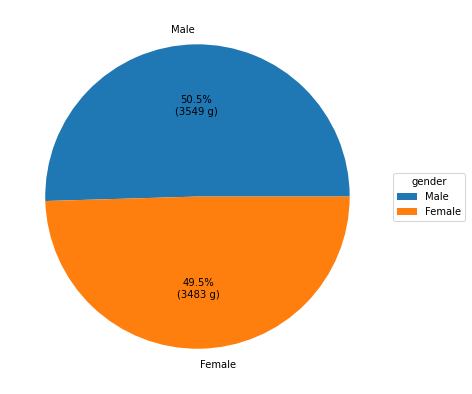

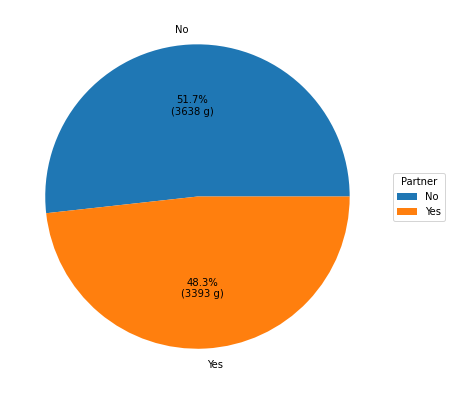

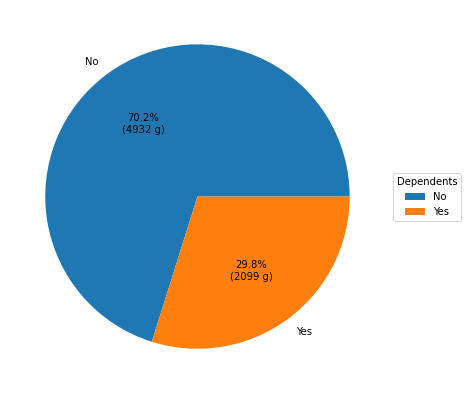

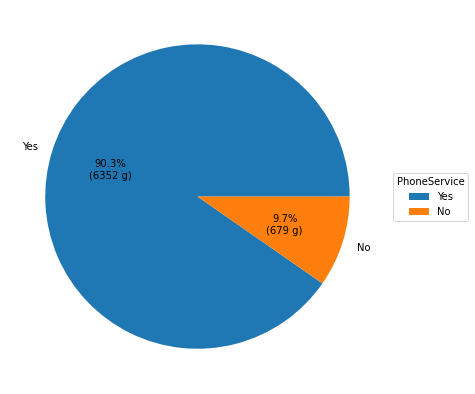

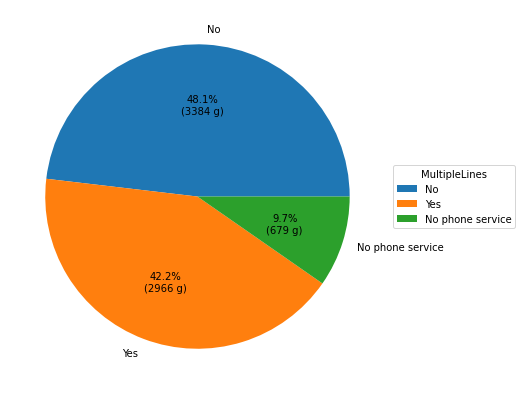

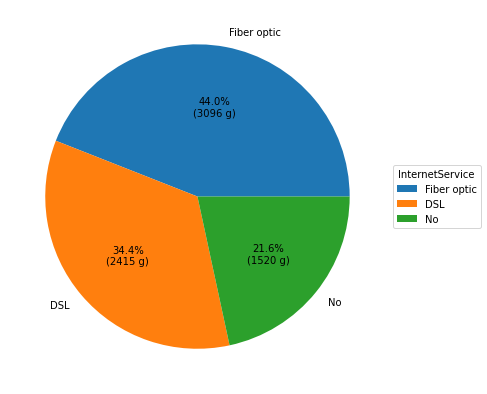

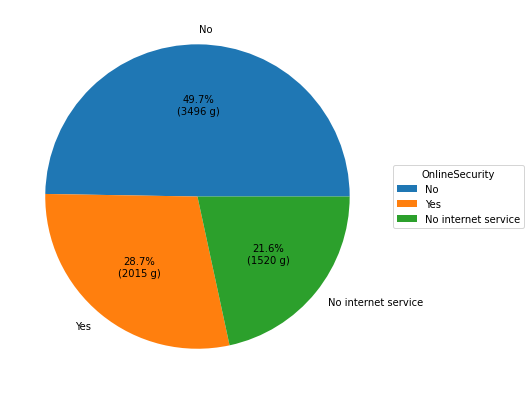

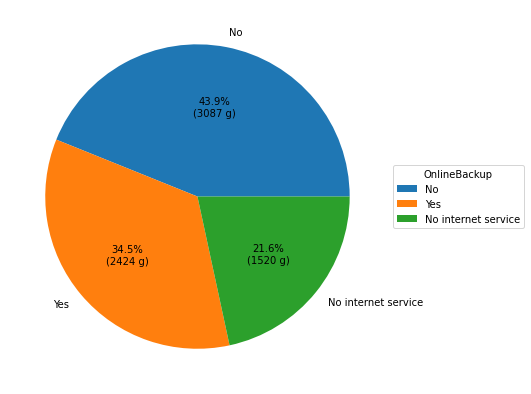

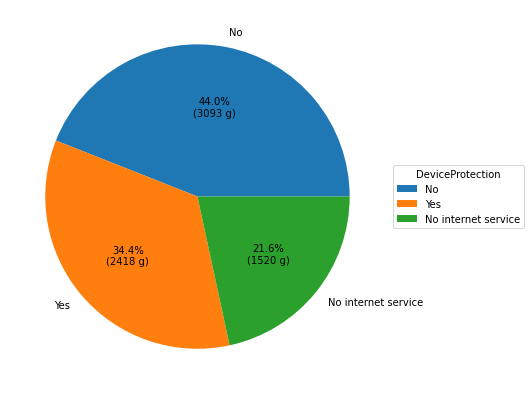

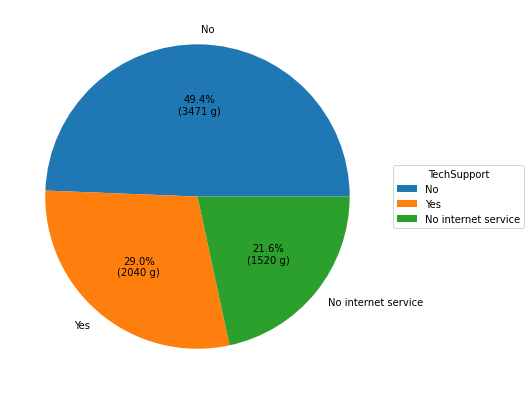

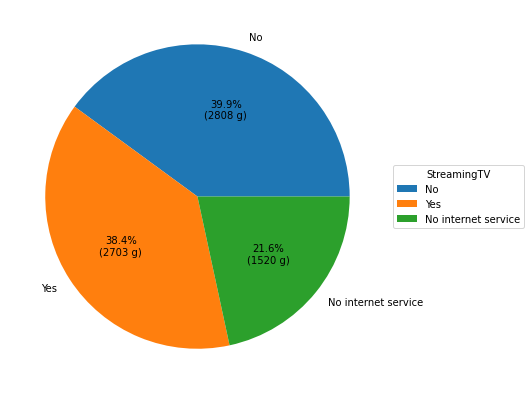

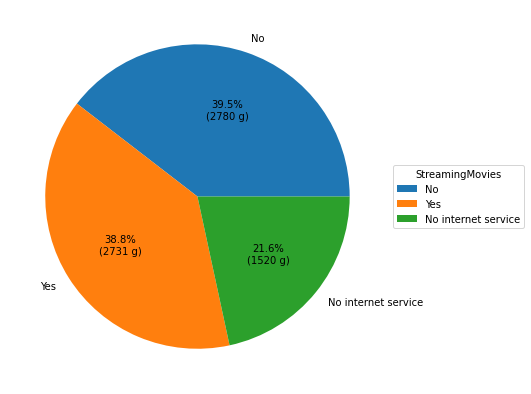

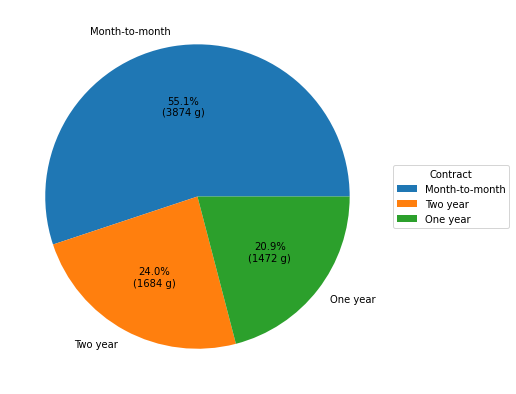

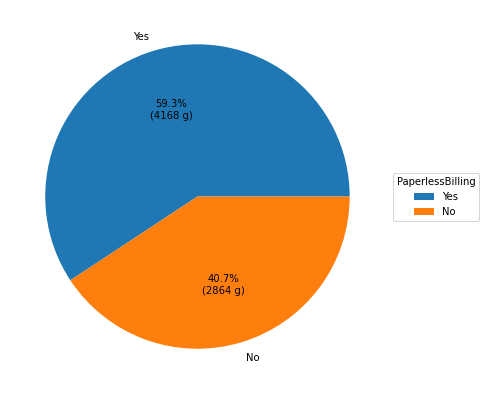

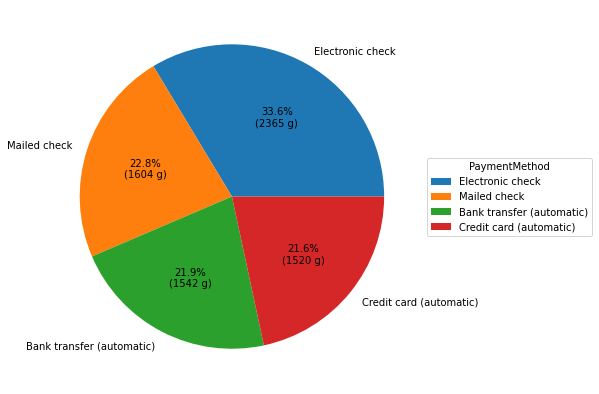

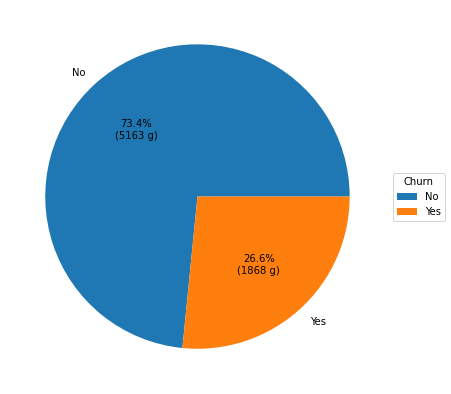

In [25]:
for i in df_final_cat:
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts=plt.pie(df_final_cat[i].value_counts(),labels=df_final_cat[i].value_counts().index,autopct=lambda pct: func(pct, df_final_cat[i].value_counts()))
    ax.legend(wedges, df_final_cat[i].value_counts().index,
          title =i,
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

2d)As per above pie charts we can conclude that:
1)Gender and Partner have approximately equal categories
2)Around 70 % customers dont have dependents
3)Around 10 % customers dont have phone service
4) Online Backup,Device Protection,tech support etc require internet connection. Hence No Internet Service category can be removed from these columns during 1 hot encoding.
5)Churn Column has 74 % yes values and 26 % No values.Churn rate is 26 % .It is imbalanced data.

In [26]:
#df_cat is a df derived from df_
df_cat=df_final.select_dtypes(include=['object'])

In [27]:
#CustomerId column is of no use for modelling/prediction as it is a surrogate key for customer representation.
df_cat.drop('customerID',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
#Final Categorical df
df_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [29]:
#Now we need to work on converting categorical features into numeric form so that we can use it for modelling.
#First we will take care of binary variables then multi-category variables
list_of_binary_vars=[]
for i in df_cat:
    if df_cat[i].nunique()==2:
        list_of_binary_vars.append(i)
    

In [30]:
list_of_binary_vars

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [31]:
#Below are the binary variables
print(df_final['gender'].unique())
    

['Female' 'Male']


In [32]:
print(df_final['Partner'].unique())
print(df_final['Dependents'].unique())
print(df_final['PhoneService'].unique())
print(df_final['PaperlessBilling'].unique())
print(df_final['Churn'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


For ML algos its important that we convert the categorical variables to numeric
First lets treat binary vars like ['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [33]:
#Function to assign 1 to Yes and 0 to No category
def binmap(x):
    return x.map({'Yes':1,'No':0})

In [34]:
#Below is categorical Feature Processing
df_cat[ ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]=df_cat[ ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].apply(binmap)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
df_cat[ ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [36]:
df_final['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
df_cat['gender']=df_cat['gender'].map({'Male':1,'Female':0})

<ipython-input-37-6632295c2d8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['gender']=df_cat['gender'].map({'Male':1,'Female':0})


In [38]:
df_cat[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


All binary variables are converted into 0,1

In [39]:
df_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0
1,1,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0
2,1,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,1
3,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0
4,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,0
7039,0,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),0
7040,0,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,0
7041,1,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,1


In [40]:
#Now we will work on the columns with more than 2 categories using 1 hot encoding

In [41]:
# Converting Multi category into numeric using 1 hot encoding
list_of_cat_vars=[]
for i in df_cat:
    if df_cat[i].nunique()>2:
        list_of_cat_vars.append(i)
    

In [42]:
list_of_cat_vars

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [43]:
#Values present in categorical Features
for i in list_of_cat_vars:
    print(i,df_cat[i].unique())

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
#Below are the steps to convert Categorical to numeric .
df_cat_1=pd.get_dummies(df_cat[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])
df_cat_1.drop(['MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

In [45]:
df_cat_2=pd.get_dummies(df_cat[['Contract','PaymentMethod']],drop_first=True)

In [46]:
df_cat_1=pd.concat([df_cat_1,df_cat_2],axis=1)

In [47]:
df_cat=pd.concat([df_cat.drop(list_of_cat_vars,axis=1),df_cat_1],axis=1)

In [48]:
df_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df_final_1=pd.concat([df_final.drop(df_final.select_dtypes(include='object').columns,axis=1),df_cat],axis=1)

In [50]:
#This is the dataframe
df_final_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,1,...,0,1,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,1,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,1,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,1


In [51]:
# We have converted all the variables to numeric. Now we can start with modelling

In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [53]:
df_final_1['SeniorCitizen']=df_final_1['SeniorCitizen'].astype('int64')

In [54]:
X=df_final_1.drop('Churn',axis=1)
y=df_final_1['Churn']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

In [56]:
X_train.shape

(5625, 30)

In [57]:
X_test.shape

(1407, 30)

In [58]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5625.000000,5625.00000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,...,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,0.161244,32.28320,64.850791,2273.007076,0.505422,0.484267,0.297244,0.903289,0.592178,0.479822,...,0.285511,0.398756,0.383644,0.391644,0.390756,0.209067,0.236089,0.215644,0.337600,0.224889
std,0.367789,24.47436,30.141288,2264.121540,0.500015,0.499797,0.457086,0.295590,0.491473,0.499637,...,0.451698,0.489686,0.486316,0.488161,0.487963,0.406678,0.424715,0.411305,0.472933,0.417546
min,0.000000,1.00000,18.550000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.00000,35.350000,405.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.00000,70.500000,1385.850000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.00000,90.000000,3771.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.00000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# We have 3 numeric Features tenure	MonthlyCharges	TotalCharges

In [60]:
#scaling of numeric Features
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [61]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [63]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
xgb.score(X_test,y_test)

0.7867803837953091

In [65]:
xgb.score(X_train,y_train)

0.9425777777777777

Above is the model without any hyperparameter tuning. It appears to be overfitted as train accuracy is way higher than test.Lets try hyper parameter tuning with GridSearchCV below:

In [66]:
params_xgb={'max_depth':range(1,20,4),'colsample_bylevel':np.arange(0.1,1,0.3),'colsample_bytree':np.arange(0.1,1,0.3),'min_child_weight':range(1,50,10),'learning_rate':np.arange(0.01,0.05,0.01)}
xgbc=XGBClassifier()
cv=5
model_cv=GridSearchCV(estimator=xgbc,param_grid=params_xgb,cv=5,scoring='accuracy')

In [67]:
model_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [68]:
model_cv.best_estimator_.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=1,
              colsample_bytree=0.7000000000000001, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=41, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [69]:
#Train Accuracy
model_cv.best_estimator_.score(X_train,y_train)

0.8147555555555556

In [70]:
#Test Accuracy
model_cv.best_estimator_.score(X_test,y_test)

0.8173418621179815

In [71]:
#Below is the XGBoost model with train and test accuracy mentioned above
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=1,
              colsample_bytree=0.7000000000000001, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=41, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
y_test_pred=model_cv.best_estimator_.predict(X_test)

In [74]:
confusion_matrix(y_test,y_test_pred)

array([[960,  92],
       [165, 190]], dtype=int64)

In [75]:
df_final['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Part B

In [76]:
#Function To detect outliers in data and remove the ones with a rule (Q1-1.5(IQR) < x < (Q3 + 1.5(IQR))) where df is the dataFrame

def Outlierremoval(df,cols):
    for i in cols:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        df=df[(df[i]>(Q1-1.5*IQR)) & (df[i]<(Q3+1.5*IQR))]
    return df


In [77]:
#We will check for multicolinearity.To find features with multicolinearity.
def correlation_check(df):
    data_corr=df.corr()
    l1=[]
    for i in data_corr:
        for j in data_corr:
            if data_corr[i][j]>=0.6 and i!=j or data_corr[i][j]<=-0.6 :
                l1.append([i,j,data_corr[i][j]])
                print(i,j,data_corr[i][j])
                return l1

def Userip_for_column_removal(l1,df):
    print(l1) #This prints the set of cols with high multicolinearity
    for i in range(df.shape[1]):
        userip=input('Enter column to be dropped')
        if userip !='stop':
            df.drop([userip],axis=1,inplace=True)
        else:
            break
    return df #This returns a df after removal of multicolinear columns
    

In [78]:
#We need to check the dtypes of features and convert the categorical ones to numeric using 1 hot encoding:
def dftype_cols(df):
    df_cat=df.select_dtypes(include='object')
    df_num=df.select_dtypes(exclude='object')
    
    cols_cat=df_cat.columns
    cols_num=df_num.columns
    
    df_cat=pd.get_dummies(df_cat,drop_first=True)
    
    scaler=StandardScaler()
    df_num[cols_num]=scaler.fit_transform(df_num[cols_num])
    
    df=pd.concat([df_cat,df_num],axis=1)
    return df

In [79]:
#Modelling
#Function to divide data into train set and test set
def datasplit(df,Target): #Target is the dependent variable
    X=df.drop(Target,axis=1)
    y=df[Target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)
    return X,y,X_train,X_test,y_train,y_test

def best_model(model,params,cv,X_tr,y_tr,X_ts,y_ts,metric='accuracy'):
    from sklearn.model_selection import GridSearchCV
    model_cv=GridSearchCV(estimator=model,param_grid=params,cv=cv,n_jobs=-1,scoring=metric)
    model_cv.fit(X_tr,y_tr)
    best_model=model_cv.best_estimator_.fit(X_tr,y_tr)
    best_score=best_model.score(X_ts,y_ts)
    print('Best score of the model is {}'.format(best_score))
    return best_model,best_score



def best_model_save(cv,X_tr,y_tr,X_ts,y_ts,metric='accuracy'):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from xgboost import XGBClassifier
    import pickle
    
    knn=KNeighborsClassifier()
    dt=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    xgb=XGBClassifier()
    
    params_knn={'n_neighbors':[3,5,7,9,12,13,15,17,19,21],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35,45],
       'p':[1,2],'weights':['uniform', 'distance']}

    params_dt={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(2,40,1), 'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(2,10,1)}

    params_rfc={'n_estimators':[5,10,50,100,120,150],'criterion':['gini','entropy'],'max_depth':range(10), 
    'min_samples_leaf':range(1,10,1)}
    
    params_xgb={'max_depth':range(1,20,4),'colsample_bylevel':np.arange(0.1,1,0.3),'colsample_bytree':np.arange(0.1,1,0.3),'min_child_weight':range(1,50,10),'learning_rate':np.arange(0.01,0.05,0.01)}

    cv=5
    
    best_model_knn,knn_score=best_model(model=knn,params=params_knn,cv=cv,X_tr=X_tr,y_tr=y_tr,X_ts=X_ts,y_ts=y_ts)
    best_model_dt,dt_score=best_model(model=dt,params=params_dt,cv=cv,X_tr=X_tr,y_tr=y_tr,X_ts=X_ts,y_ts=y_ts)
    best_model_rfc,rfc_score=best_model(model=rfc,params=params_rfc,cv=cv,X_tr=X_tr,y_tr=y_tr,X_ts=X_ts,y_ts=y_ts)
    best_model_xgb,xgb_score=best_model(model=xgb,params=params_xgb,cv=cv,X_tr=X_tr,y_tr=y_tr,X_ts=X_ts,y_ts=y_ts)
    
    model_list=['K_Nearest_Neighbors','Decision Tree','Random Forest','XG BOOST']
    scores_test_list=[knn_score,dt_score,rfc_score,xgb_score]
    Model_scores_df=pd.DataFrame(data=[model_list,scores_test_list]).T
    Model_scores_df.rename({0:'Models',1:'Test_scores'},axis=1,inplace=True)
    print(Model_scores_df)
    
    mod=Model_scores_df[Model_scores_df['Test_scores']==Model_scores_df['Test_scores'].max()]['Models'].item()
    
    
    if mod=='K_Nearest_Neighbors':
        print('knn is best model')
        pickle.dump(best_model_knn,open('KNN.pickle','wb'))
        
    if mod=='Decision Tree':
        print('dt is best model')
        pickle.dump(best_model_dt,open('DT.pickle','wb'))
        
    if mod=='Random Forest':
        print('rf is best model')
        pickle.dump(best_model_rfc,open('RFC.pickle','wb'))
        
    if mod=='XG BOOST':
        print('xgb is best model')  
        pickle.dump(best_model_xgb,open('XGB.pickle','wb'))       
        
    
        
    


In [80]:
#Now lets try running these functions using df_final

df_final.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
#Preparing data to be used in our new generic functions 
df1_new=df_final.drop(['customerID'],axis=1)
cols=df1_new.select_dtypes(exclude='object').columns

In [82]:
cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [83]:
cols=['tenure', 'MonthlyCharges', 'TotalCharges']

In [84]:
#Remove outliers by using Outlierremoval function
df1_new=Outlierremoval(df1_new,cols)

In [85]:
df1_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#Finding highly correlated features and capturing in below list
list_of_correlated_cols=correlation_check(df1_new)

tenure TotalCharges 0.8258804609332019


In [87]:
list_of_correlated_cols

[['tenure', 'TotalCharges', 0.8258804609332019]]

In [88]:
#Below function prompts user input for feature removal in case they are highly corelated
df1_new=Userip_for_column_removal(list_of_correlated_cols,df1_new)

[['tenure', 'TotalCharges', 0.8258804609332019]]
Enter column to be droppedtenure
Enter column to be droppedstop


In [89]:
#As per above there were no columns with high correlation
df1_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
#We need to convert categorical columns to numbers. below function can do the task
df1_new=dftype_cols(df1_new)

<ipython-input-78-8207d0244cc8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[cols_num]=scaler.fit_transform(df_num[cols_num])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [91]:
#This issue of having high number of columns is happening as Total charges is considered categorical

In [92]:
df1_new

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.440327,-1.161694,-0.994194
1,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,-0.440327,-0.260878,-0.173740
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,-0.440327,-0.363923,-0.959649
3,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,-0.440327,-0.747850,-0.195248
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,-0.440327,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,-0.440327,0.664868,-0.129180
7039,0,1,1,1,0,1,1,0,0,0,...,1,0,1,1,0,0,0,-0.440327,1.276493,2.241056
7040,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,-0.440327,-1.170004,-0.854514
7041,1,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,1,2.271039,0.319168,-0.872095


In [93]:
#Splitting data into train and test so that we can use them in the model.
X,y,X_train,X_test,y_train,y_test=datasplit(df1_new,'Churn_Yes')

In [94]:
#This function below runs the dataset on multiple algorithms and selects the best model on basis of accuracy.
#The best model is then saved in the location.
#We can change metric to precision & recall as well to tune it for these metrics. In this case we used Accuracy.
best_model_save(cv,X_train,y_train,X_test,y_test,metric='accuracy')

Best score of the model is 0.7874911158493249
Best score of the model is 0.8017057569296375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-package

Best score of the model is 0.8123667377398721
Best score of the model is 0.8109452736318408
                Models Test_scores
0  K_Nearest_Neighbors    0.787491
1        Decision Tree    0.801706
2        Random Forest    0.812367
3             XG BOOST    0.810945
rf is best model


In [ ]:
# As we can see the Generalized code works fine.Written multiple functions which can be used on Any Dataset and stores best model.
